In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
d=pd.read_csv('train.csv')
d

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [93]:
d.shape

(5961, 7)

Observation:Dataset has 5961 rows and 7 columns

In [94]:
d.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [95]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Observation:all coulmns except Fees are object
            Fees is datatype int

In [96]:
print(d["Profile"].unique())

['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']


In [97]:
#Splitting place as p1 p2 and Qualification as q1 q2
p1=d['Place'].str.split(",").str[0]
d['p1'] = p1
p2=d['Place'].str.split(",").str[1]
d['p2'] = p2
q1=d['Qualification'].str.split(",").str[0]
d['q1'] = q1
q2=d['Qualification'].str.split(",").str[1]
d['q2'] = q2

In [98]:
#Remove % and years experience
d['Experience']=pd.to_numeric(d['Experience'].str.replace("years experience",""))
d['Rating']=pd.to_numeric(d['Rating'].str.replace("%",""))

In [99]:
#Replacing NAN value for mis.
def func(x):
    try:
        int(x)
        return int(x)
    except:
        return np.nan
    
p=d['Miscellaneous_Info'].str.split(r'Feedback').str[0].str.split(" ").str[-2].apply(func)
d['mis'] = p

In [100]:
#drop Qualification,Place,Miscellaneous_Info
d=d.drop(["Qualification","Place","Miscellaneous_Info"],axis=1)
d

,Experience,Rating,Profile,Fees,p1,p2,q1,q2,mis
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,16.0
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,76.0
2,9,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,12,NaN,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,10.0
4,20,100.0,Ayurveda,250,Keelkattalai,Chennai,BAMS,NaN,4.0
...,...,...,...,...,...,...,...,...,...
5956,19,98.0,ENT Specialist,300,Basavanagudi,Bangalore,MBBS,MS - ENT,45.0
5957,33,NaN,General Medicine,100,Nungambakkam,Chennai,MBBS,NaN,NaN
5958,41,97.0,General Medicine,600,Greater Kailash Part 2,Delhi,MBBS,NaN,11.0
5959,15,90.0,General Medicine,100,Vileparle West,Mumbai,MBBS,MD - General Medicine,NaN


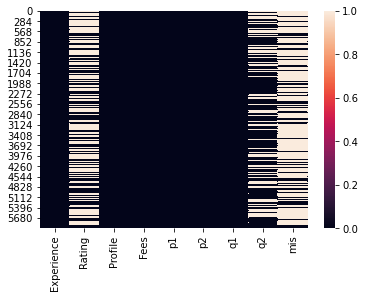

In [101]:
#check null values
sns.heatmap(d.isnull())

Observation:Null values are present in Rating,q2 and mis

In [102]:
#Replace null value 
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="mean")
d['Rating']=imp1.fit_transform(d['Rating'].values.reshape(-1,1))
d['mis']=imp1.fit_transform(d['mis'].values.reshape(-1,1))

for col in ['q2']:
    d[col].fillna(d[col].mode()[0],inplace=True)

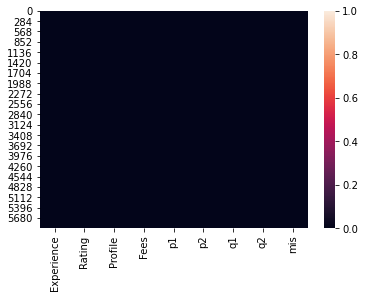

In [103]:
sns.heatmap(d.isnull())

Observation:After replacing null values now no null values are present

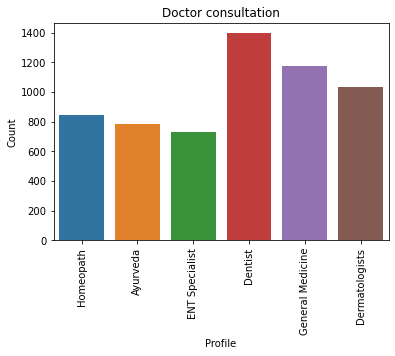

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [104]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Profile",data=d)
plt.title("Doctor consultation")
plt.xlabel("Profile")
plt.xticks(rotation='vertical')
plt.ylabel("Count")
plt.show()
print(d.Profile.value_counts())

Observation: Denist count is high 1397, followed by general medicine and dermatologist 

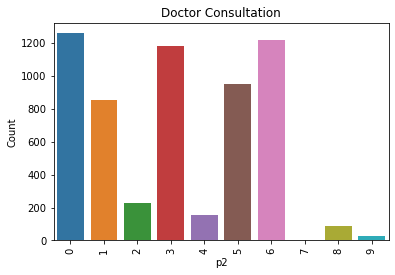

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: Place, dtype: int64


In [128]:
plt.subplots(figsize=(6,4))
sns.countplot(x="p2",data=d)
plt.title("Doctor Consultation")
plt.xlabel("p2")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()
print(p2.value_counts())

Observation: More clinic are in Bangalore 1258 followed by mumbai,Delhi. Less clinc are in Thiruvananthapuram and Sector 5                 1

Profile    Fees
Ayurveda   100     203
           200     126
           300     120
           500     111
           150      57
                  ... 
Homeopath  40        1
           130       1
           499       1
           550       1
           920       1
Name: Fees, Length: 133, dtype: int64


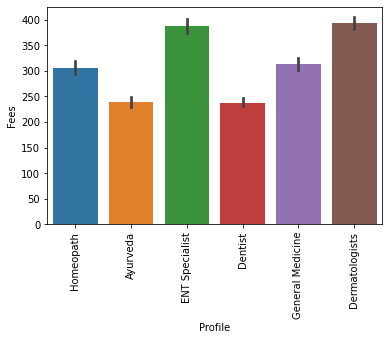

In [106]:
sns.barplot(x="Profile",y="Fees",data=d)
plt.xticks(rotation='vertical')
print(d.groupby('Profile')['Fees'].value_counts())

Observation: Fees amount is high dermatogologists followed by ENT specilist and homeopthy. Lowest is for denstist and ayuveda

p2                   Fees
 Bangalore           300     229
                     500     204
                     200     185
                     100     147
                     400     147
                            ... 
 Thiruvananthapuram  350       2
                     500       2
                     5         1
                     80        1
                     250       1
Name: Fees, Length: 148, dtype: int64


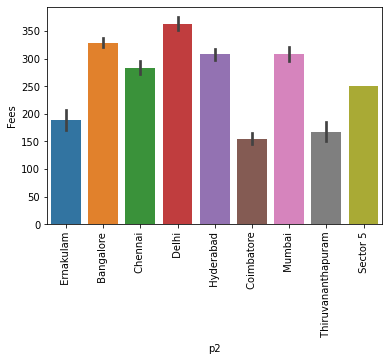

In [107]:
sns.barplot(x="p2",y="Fees",data=d)
plt.xticks(rotation='vertical')
print(d.groupby('p2')['Fees'].value_counts())

Observation: Fees in Delhi is high, followed by Bangalore and Hyderbad and Mumbai. Lowest is in Coimbatore

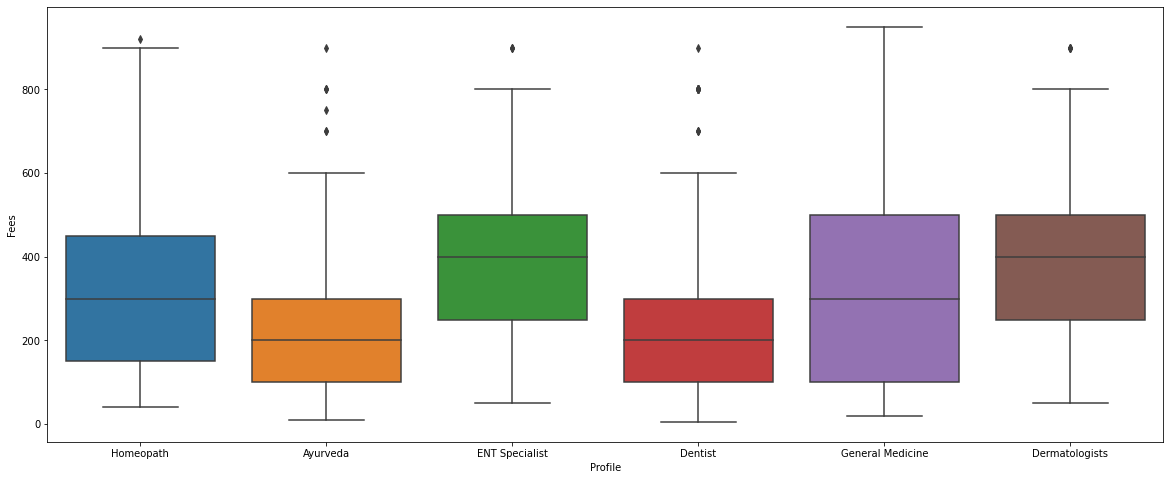

In [108]:
plt.figure(figsize=(20,8))
mean_price=np.mean(d['Fees'])
sns.boxplot(y='Fees',x='Profile',data=d)

Observation: Outliers are present ayurveda and densist. General medicine has higher min max when compared to others

<function matplotlib.pyplot.show(*args, **kw)>

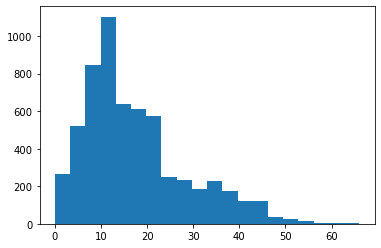

In [109]:
plt.hist(d['Experience'],bins=20)
plt.show

Observation: Maximum of doctors ae having experience in between 10-16

In [110]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=['Profile','p2','q1','q2','p1']
for val in list1:
    d[val]=le.fit_transform(d[val].astype(str))

In [111]:
d

,Experience,Rating,Profile,Fees,p1,p2,q1,q2,mis
0,24,100.000000,5,100,296,4,8,252,16.000000
1,12,98.000000,0,350,855,0,5,241,76.000000
2,9,94.643475,3,300,452,0,79,334,39.133923
3,12,94.643475,0,250,68,0,12,7,10.000000
4,20,100.000000,0,250,335,1,5,328,4.000000
...,...,...,...,...,...,...,...,...,...
5956,19,98.000000,3,300,70,0,79,328,45.000000
5957,33,94.643475,4,100,535,1,79,328,39.133923
5958,41,97.000000,4,600,215,3,79,328,11.000000
5959,15,90.000000,4,100,840,6,79,249,39.133923


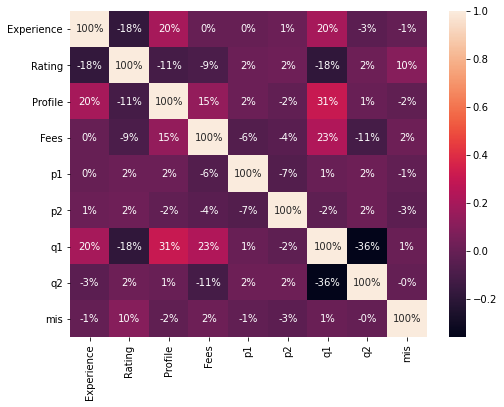

In [129]:
#Correlation
dfcor=d.corr()
plt.figure(figsize=(8,6))
sns.heatmap(dcor,annot=True,fmt='.0%')

In [137]:
d.describe()

,Experience,Rating,Profile,Fees,p1,p2,q1,q2,mis
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,94.643475,2.441872,307.944640,412.804395,3.098977,47.962087,255.819661,39.133923
std,11.142798,5.244204,1.658014,190.920373,256.586353,2.350982,39.371696,102.878767,46.491790
min,0.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,94.643475,1.000000,150.000000,195.000000,1.000000,6.000000,227.000000,39.133923
50%,14.000000,94.643475,2.000000,300.000000,409.000000,3.000000,79.000000,293.000000,39.133923
75%,23.000000,96.000000,4.000000,500.000000,626.000000,5.000000,79.000000,328.000000,39.133923
max,66.000000,100.000000,5.000000,950.000000,866.000000,9.000000,150.000000,425.000000,1782.000000


Obsevation:
    Exp min is 0 and max is 66
    Rating min is 7 and max is 100
    fees min is 5 and max is 950
    difference between 75% and max is higher in exp,fees,mis outliers can be present

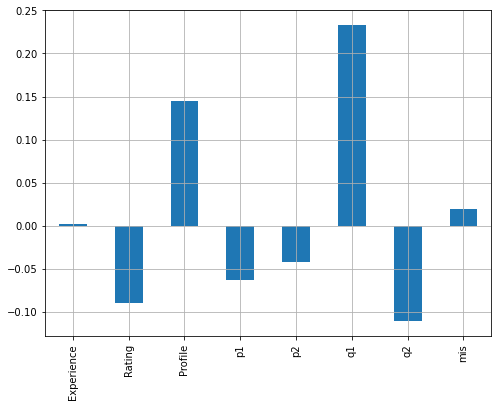

In [113]:
plt.figure(figsize=(8,6))
d.drop('Fees',axis=1).corrwith(d['Fees']).plot(kind='bar',grid=True)

Observation: q2 and profile are highly correlated to target variable Fees.
    expierence and mis are less correated to target variable Fees
    rating p1,p2,q2 are negatively correlated to target variable Fees.

Experience       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Rating        AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Profile        AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Fees          AxesSubplot(0.606034,0.536818;0.133621x0.343182)
p1            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
p2                  AxesSubplot(0.125,0.125;0.133621x0.343182)
q1               AxesSubplot(0.285345,0.125;0.133621x0.343182)
q2                AxesSubplot(0.44569,0.125;0.133621x0.343182)
mis              AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

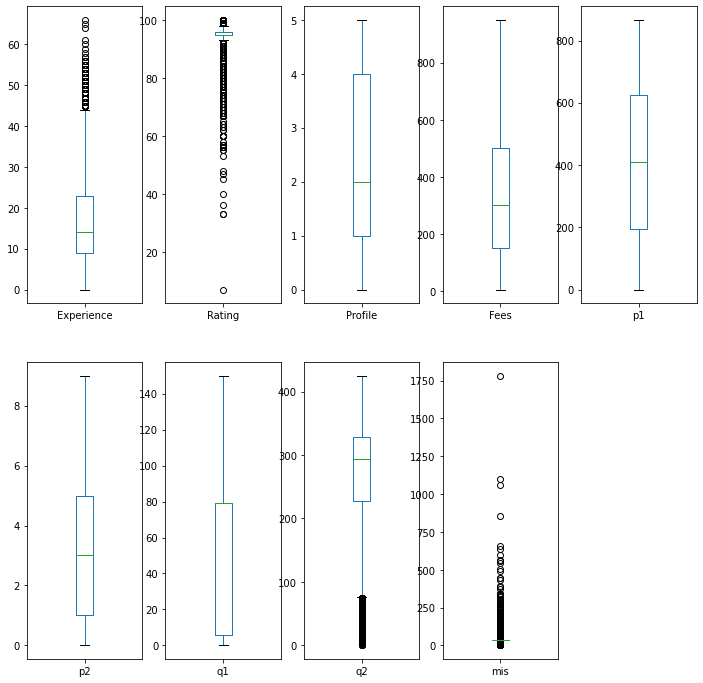

In [114]:
d.plot(kind='box',subplots=True,layout=(2,5),figsize=(12,12))

Observation: Outliers are present in q2,mis,exp and rating

In [115]:
#Outliers
from scipy.stats import zscore
z=np.abs(zscore(d))
threshold=3
print(np.where(z>3))
data=d[(z<3).all(axis=1)]
data

(array([  55,   67,  105,  110,  140,  178,  183,  209,  275,  293,  309,
        325,  333,  372,  377,  425,  458,  465,  548,  585,  590,  632,
        692,  713,  731,  754,  757,  786,  787,  788,  798,  815,  820,
        837,  901,  911,  918,  968,  979,  987,  990,  998, 1009, 1018,
       1111, 1170, 1240, 1303, 1314, 1325, 1327, 1392, 1425, 1433, 1444,
       1475, 1492, 1594, 1614, 1631, 1648, 1717, 1741, 1747, 1755, 1770,
       1777, 1778, 1796, 1817, 1852, 1860, 1877, 1981, 2018, 2023, 2025,
       2062, 2089, 2161, 2165, 2202, 2230, 2252, 2262, 2277, 2281, 2309,
       2323, 2391, 2393, 2428, 2444, 2478, 2500, 2505, 2522, 2548, 2585,
       2586, 2590, 2623, 2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758,
       2829, 2833, 2880, 2899, 2910, 2962, 2991, 3002, 3023, 3042, 3093,
       3120, 3126, 3144, 3180, 3191, 3194, 3222, 3254, 3270, 3332, 3333,
       3365, 3367, 3463, 3472, 3478, 3493, 3526, 3537, 3542, 3544, 3593,
       3604, 3608, 3615, 3627, 3661, 3662, 3676, 3

,Experience,Rating,Profile,Fees,p1,p2,q1,q2,mis
0,24,100.000000,5,100,296,4,8,252,16.000000
1,12,98.000000,0,350,855,0,5,241,76.000000
2,9,94.643475,3,300,452,0,79,334,39.133923
3,12,94.643475,0,250,68,0,12,7,10.000000
4,20,100.000000,0,250,335,1,5,328,4.000000
...,...,...,...,...,...,...,...,...,...
5956,19,98.000000,3,300,70,0,79,328,45.000000
5957,33,94.643475,4,100,535,1,79,328,39.133923
5958,41,97.000000,4,600,215,3,79,328,11.000000
5959,15,90.000000,4,100,840,6,79,249,39.133923


In [116]:
print(d.shape) #dataset
print(data.shape) #Removed Outliers

(5961, 9)
(5716, 9)


In [117]:
#Skewness
data.skew()

Experience    0.914749
Rating       -1.539197
Profile       0.136187
Fees          0.729462
p1            0.110470
p2            0.076159
q1            0.125117
q2           -1.105679
mis           2.234760
dtype: float64

In [ ]:
Observation: Given data is not skewed except mis.

In [118]:
df_x=data.drop(columns=['Fees'])
y=pd.DataFrame(data['Fees'])
x=pd.DataFrame(df_x)

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=df_x.columns)

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
for r_state in range(30,100):
    reg=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)

max r2 score corresponding to  42 is 0.0959978775422885


In [122]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn import linear_model
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print(m,"score",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('mean abs error',mean_absolute_error(y_test,predm))
    print('mean square error',mean_squared_error(y_test,predm))
    print('RMSE',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2score",r2_score(y_test,predm))
    print("*********************************************")
    print("\n")

LinearRegression() score 0.07528031362941934
mean abs error 149.98390932545615
mean square error 33889.6541235635
RMSE 184.09142870748627
r2score 0.046602361879171994
*********************************************


DecisionTreeRegressor() score 0.9984679023486799
mean abs error 164.92307692307693
mean square error 53208.441919191915
RMSE 230.6695513482261
r2score -0.4968816934184954
*********************************************


KNeighborsRegressor() score 0.36184637475330084
mean abs error 142.09755244755246
mean square error 35193.33398601398
RMSE 187.59886456483147
r2score 0.009926705727763552
*********************************************


SVR() score 0.04979799436548571
mean abs error 146.43213007977658
mean square error 34902.11494453232
RMSE 186.8210773562028
r2score 0.018119399147180415
*********************************************


Lasso() score 0.07506398151197047
mean abs error 149.96410367226815
mean square error 33802.641751333154
RMSE 183.85494758459222
r2score 0.049050

Observation:Linear-46
DTR-49
KNN-9
SVR-18
LASSO-49
RIDGE-46
Adaboost-12
RFR-13
GB-20

Lasso has the highest r2score
    

In [123]:
#Crossvalidation
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    rfcscores=cross_val_score(m,x,y,cv=5,scoring='r2')
    print(m)
    print('score',rfcscores)
    print('mean score',rfcscores.mean(),'std',rfcscores.std())
    print('*****************************')

LinearRegression()
score [0.06624799 0.06445068 0.058126   0.06191809 0.07434253]
mean score 0.06501705866813731 std 0.005401679895482501
*****************************
DecisionTreeRegressor()
score [-0.63589415 -0.54386092 -0.5494081  -0.52233311 -0.57041607]
mean score -0.5643824719307082 std 0.038894316957646925
*****************************
KNeighborsRegressor()
score [ 0.0346352   0.03317097  0.02261947  0.00594934 -0.01432358]
mean score 0.016410278529634236 std 0.01846956493447571
*****************************
SVR()
score [0.05292569 0.02539844 0.05111462 0.00178498 0.0632665 ]
mean score 0.038898045143607084 std 0.022358266058650156
*****************************
Lasso()
score [0.06601134 0.06419226 0.05817293 0.06331257 0.07282977]
mean score 0.06490377447849079 std 0.004741107127728413
*****************************
Ridge()
score [0.06624908 0.06445151 0.05812553 0.06192103 0.074344  ]
mean score 0.06501822988427042 std 0.005402002392873802
*****************************
ElasticN

Observation:Lasso is having mean score 65% highest when compared to others methods

In [130]:
#Gridsearchcv for lasso
from sklearn.model_selection import GridSearchCV
las=Lasso()
parameters={'alpha':['1','0','0.1','0.01','0.001','0.0001'],'random_state':range(42,200)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
print('best parameters',clf.best_params_)

best parameters {'alpha': '1', 'random_state': 42}


In [131]:
#Best model for ridge on adaboost
from sklearn.ensemble import AdaBoostRegressor
l=Lasso()
r=AdaBoostRegressor(base_estimator=l,n_estimators=5,learning_rate=0.1,random_state=42)
r.fit(x_train,y_train)
predr=r.predict(x_test)
print(r.score(x_train,y_train))
print('mean abs error',mean_absolute_error(y_test,predr))
print('mean square error',mean_squared_error(y_test,predr))
print('RMSE',np.sqrt(mean_squared_error(y_test,predr)))
print("r2score",r2_score(y_test,predr))

0.07446002676155261
mean abs error 150.0970276834453
mean square error 33748.37866803741
RMSE 183.70731794906106
r2score 0.0505767808901163


# Test data

In [132]:
f=pd.read_csv('test.csv')
f

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [133]:
#Applyting same steps as in Test data
#Split p1 p2 q1 q2
p1=f['Place'].str.split(",").str[0]
f['p1'] = p1
p2=f['Place'].str.split(",").str[1]
f['p2'] = p2
q1=f['Qualification'].str.split(",").str[0]
f['q1'] = q1
q2=f['Qualification'].str.split(",").str[1]
f['q2'] = q2

#Replace % and years experience
f['Experience']=pd.to_numeric(f['Experience'].str.replace("years experience",""))
f['Rating']=pd.to_numeric(f['Rating'].str.replace("%",""))

#replace and split mis 
def func(x):
    try:
        int(x)
        return int(x)
    except:
        return np.nan

p=f['Miscellaneous_Info'].str.split(r'Feedback').str[0].str.split(" ").str[-2].apply(func)
f['mis'] = p

#Simple imputer to replace NAN value
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="mean")
f['Rating']=imp1.fit_transform(f['Rating'].values.reshape(-1,1))
f['mis']=imp1.fit_transform(f['mis'].values.reshape(-1,1))

for col in ['q2']:
    f[col].fillna(f[col].mode()[0],inplace=True)

#Drop qaulification,place,miscellaneous 
f=f.drop(["Qualification","Place","Miscellaneous_Info"],axis=1)

#Label encoding
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=['Profile','p2','q1','q2','p1']
for val in list1:
    f[val]=le.fit_transform(f[val].astype(str))

#Outliers
from scipy.stats import zscore
z=np.abs(zscore(f))
threshold=3
print(np.where(z>3))
data1=f[(z<3).all(axis=1)]
data1

(array([   2,   17,   65,   72,  104,  145,  168,  214,  258,  264,  303,
        362,  398,  435,  436,  449,  454,  533,  564,  617,  622,  641,
        652,  671,  743,  773,  840,  951,  964,  976,  992,  992,  996,
       1001, 1042, 1056, 1061, 1094, 1099, 1115, 1121, 1130, 1201, 1229,
       1233, 1246, 1284, 1288, 1294, 1297, 1337, 1394, 1405, 1425, 1451,
       1469, 1521, 1530, 1632, 1640, 1657, 1724, 1776, 1790, 1793, 1817,
       1825, 1830, 1852, 1856, 1875, 1958, 1980], dtype=int64), array([1, 1, 1, 1, 0, 7, 1, 1, 0, 0, 7, 1, 0, 7, 1, 1, 1, 7, 1, 0, 1, 0,
       1, 1, 7, 1, 7, 7, 1, 1, 0, 1, 1, 1, 7, 7, 1, 1, 1, 7, 1, 7, 1, 7,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 7, 7, 1, 7, 1, 1, 1, 1, 1, 7, 7,
       1, 1, 7, 1, 1, 1, 7], dtype=int64))


,Experience,Rating,Profile,p1,p2,q1,q2,mis
0,35,94.441472,4,142,6,48,132,42.37691
1,31,94.441472,3,577,5,48,79,42.37691
3,0,94.441472,0,373,3,1,132,42.37691
4,16,100.000000,1,231,0,2,157,42.37691
5,14,90.000000,1,552,1,2,156,42.37691
...,...,...,...,...,...,...,...,...
1982,10,94.441472,0,58,0,1,86,42.37691
1983,4,94.441472,2,96,1,52,241,42.37691
1984,9,94.441472,4,423,1,48,153,42.37691
1985,12,98.000000,1,26,0,2,132,42.37691


In [134]:
print(f.shape) #dataset
print(data1.shape) #Removed Outliers

(1987, 8)
(1915, 8)


In [135]:
#predicting 
r.predict(data1)

array([-1236.60435727, -6862.81475088, -5867.78346527, ...,
       -4988.97905432, -1155.8986326 , -4221.29941218])

In [136]:
df=pd.DataFrame(predr)
df.to_csv('Finaldocpred.csv')